In [12]:

import cv2
import numpy as np
from matplotlib import pyplot as plt

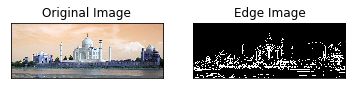

In [13]:
# This code block is for Canny edge detection
img = cv2.imread('images/TajMahal.jpg')
# Image source and attribution : By This image was produced by me, David Castor (user:dcastor). The pictures I submit to the Wikipedia Project are released to the public domain. This gives you the right to use them in any way you like, without any kind of notification. This said, I would still appreciate to be mentioned as the originator whenever you think it complies well with your use of the picture. A message to me about how it has been used would also be welcome. You are obviously not required to respond to these wishes of mine, just in a friendly manner encouraged to. (All my photos are placed in Category:Images by David Castor or a subcategory thereof.) - Own work, Public Domain, 
# https://commons.wikimedia.org/w/index.php?curid=39969079

edges = cv2.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [14]:
# This code block does a Garyscale using a simple technique rather than using the cv2.COLOR_BGR2GRAY
img = cv2.imread('images/TajMahal.jpg',0)
cv2.imshow('Grayscale', img)
cv2.waitKey()
cv2.destroyAllWindows()

In [8]:
# This code takes the image and rotates, note we have used a new variable called as image here instead of img
image = cv2.imread('images/TajMahal.jpg')
height, width = image.shape[:2]

# Divide by two to rototate the image around its centre
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, .5)

rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

cv2.imshow('Rotated Image of Taj', rotated_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [9]:
import cv2
import numpy as np

image = cv2.imread('images/buildingBlog.jpg')

# Grayscale and Canny Edges extracted
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 170, apertureSize = 3)

# Run HoughLines using a rho accuracy of 1 pixel
# theta accuracy of np.pi / 180 which is 1 degree
# Our line threshold is set to 190 (number of points on line)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 190)

# We iterate through each line and convert it to the format
# required by cv.lines (i.e. requiring end points)
for rho, theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

cv2.imshow('Hough Lines', image)
cv2.waitKey(0)
cv2.destroyAllWindows()